In [1]:
import tensorflow as tf
import numpy as np

In [2]:
corpus_raw = "He is the king . The king is royal . She is the royal queen"

In [3]:
raw_sentence = corpus_raw.split(".")
sentences = []
for sentence in raw_sentence:
    sentences.append(sentence.strip().split())

sentences

[['He', 'is', 'the', 'king'],
 ['The', 'king', 'is', 'royal'],
 ['She', 'is', 'the', 'royal', 'queen']]

In [4]:
data = []
WINDOW_SIZE = 2

for sentence in sentences:
    for word_index, word in enumerate(sentence):
        start_index = max(word_index - WINDOW_SIZE, 0)
        end_index = min(word_index + WINDOW_SIZE + 1, len(sentence))
        
        for nb_word in sentence[start_index : word_index]:
            data.append([word, nb_word])
        
        for nb_word in sentence[word_index + 1 : end_index]:
            data.append([word, nb_word])

data

[['He', 'is'],
 ['He', 'the'],
 ['is', 'He'],
 ['is', 'the'],
 ['is', 'king'],
 ['the', 'He'],
 ['the', 'is'],
 ['the', 'king'],
 ['king', 'is'],
 ['king', 'the'],
 ['The', 'king'],
 ['The', 'is'],
 ['king', 'The'],
 ['king', 'is'],
 ['king', 'royal'],
 ['is', 'The'],
 ['is', 'king'],
 ['is', 'royal'],
 ['royal', 'king'],
 ['royal', 'is'],
 ['She', 'is'],
 ['She', 'the'],
 ['is', 'She'],
 ['is', 'the'],
 ['is', 'royal'],
 ['the', 'She'],
 ['the', 'is'],
 ['the', 'royal'],
 ['the', 'queen'],
 ['royal', 'is'],
 ['royal', 'the'],
 ['royal', 'queen'],
 ['queen', 'the'],
 ['queen', 'royal']]

In [5]:
words = []
for word in corpus_raw.split():
    if word != ".":
        words.append(word)
words = set(words)

word2int = {}
int2word = {}
vocab_size = len(words)

for i, word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

print(word2int)
print(int2word)

{'She': 0, 'The': 1, 'He': 2, 'is': 3, 'king': 4, 'royal': 5, 'queen': 6, 'the': 7}
{0: 'She', 1: 'The', 2: 'He', 3: 'is', 4: 'king', 5: 'royal', 6: 'queen', 7: 'the'}


In [6]:
def to_one_hot(word_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[word_index] = 1
    return temp

In [7]:
x_train = []
y_train = []
for words in data:
    x_train.append(to_one_hot(word2int[words[0]], vocab_size))
    y_train.append(to_one_hot(word2int[words[1]], vocab_size))

In [8]:
x_train = np.asarray(x_train, dtype=np.float32)
y_train = np.asarray(y_train, dtype=np.float32)

x_train

array([[0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 

In [9]:
class Word2Vec:
    def __init__(self, vocab_size=10, embedding_dim=5, optimizer='sgd', epochs=1000, learning_rate=0.01):
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        if optimizer == 'adam':
            self.optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
        else:
            self.optimizer = tf.optimizers.SGD(learning_rate=learning_rate)
        self.epochs = epochs
        
        # hidden layer 파라미터 설정
        self.W1 = tf.Variable(tf.random.normal([self.vocab_size, self.embedding_dim]))
        self.b1 = tf.Variable(tf.random.normal([self.embedding_dim]))
        
        # output layer 파라미터 설정
        self.W2 = tf.Variable(tf.random.normal([self.embedding_dim, self.vocab_size]))
        self.b2 = tf.Variable(tf.random.normal([self.vocab_size]))

    def vectorized(self, word_index):
        return (self.W1 + self.b1)[word_index]


    def train(self, x_train, y_train):
        for i in range(self.epochs):
            with tf.GradientTape() as tape:
                hidden_layer = tf.add(tf.matmul(x_train, self.W1), self.b1)
                output_layer = tf.add(tf.matmul(hidden_layer, self.W2), self.b2)

                pred = tf.nn.softmax(output_layer)
                loss = tf.reduce_mean(-tf.math.reduce_sum(y_train*tf.math.log(pred), axis=[1]))

                grads = tape.gradient(loss, [self.W1, self.b1, self.W2, self.b2])
                self.optimizer.apply_gradients(zip(grads, [self.W1, self.b1, self.W2, self.b2]))

            if i % 1000 == 0:
                print(loss)

In [10]:
w2v = Word2Vec(vocab_size=vocab_size, embedding_dim=5, optimizer='SGD', epochs=10000, learning_rate=0.1)
w2v.train(x_train, y_train)

tf.Tensor(4.3823414, shape=(), dtype=float32)
tf.Tensor(1.4145879, shape=(), dtype=float32)
tf.Tensor(1.3840038, shape=(), dtype=float32)
tf.Tensor(1.3787315, shape=(), dtype=float32)
tf.Tensor(1.3769333, shape=(), dtype=float32)
tf.Tensor(1.3760853, shape=(), dtype=float32)
tf.Tensor(1.3756049, shape=(), dtype=float32)
tf.Tensor(1.3752997, shape=(), dtype=float32)
tf.Tensor(1.3750906, shape=(), dtype=float32)
tf.Tensor(1.3749387, shape=(), dtype=float32)


In [11]:
w2v.vectorized(word2int['queen']).numpy()

array([-0.95338166, -0.27246356, -3.5666904 ,  0.04086742, -0.00802386],
      dtype=float32)

In [12]:
w2v.vectorized(word2int['king']).numpy()

array([-2.7974787 , -1.1826966 , -0.8962433 , -0.41481996, -0.1611808 ],
      dtype=float32)

In [13]:
vector = w2v.W1 + w2v.b1
vector.shape

TensorShape([8, 5])

In [14]:
from sklearn.manifold import TSNE
from sklearn import preprocessing

model = TSNE(n_components=2, random_state=42) # 2차원으로 바꿈
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vector)

normalizer = preprocessing.Normalizer() # -1, 1 사이를 표현
vectors = normalizer.fit_transform(vectors,'l2')

queen [0.94978195 0.31291252]
royal [ 0.787192   -0.61670804]


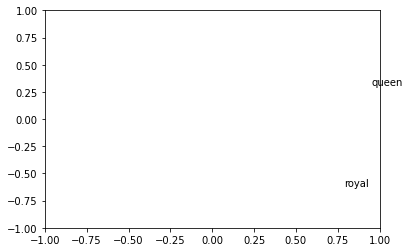

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlim(left=-1, right=1)
ax.set_ylim(bottom=-1, top=1)
for word in words:
    print(word,vectors[word2int[word]])
    ax.annotate(word, (vectors[word2int[word]][0], vectors[word2int[word]][1]))
    
plt.show()

## 실습

In [15]:
import pandas as pd
df_news = pd.read_csv('news.csv')

## 데이터 확인

In [16]:
df_news.head()

,date,media,title,content,ngrams
0,2005-01-01,연합인포맥스,내년 美국채수익률 5% 넘어서기 어려울 듯,2005년 10년만기 미국 국채수익률이 연방준비제도이사회(FRB)의 금리인상 지속...,"만기/NNG,국채/NNG,수익률/NNG,fed/NNG,fed/NNG,금리/NNG,인..."
1,2005-01-01,연합인포맥스,[뉴욕채권-마감] 10년만기 국채수익률 작년보다 낮은 수준서 마쳐,2년만기 국채가격 4년래 최악의 한해 보내 10년만기 미국 국채수익률이 ...,"만기/NNG,국채/NNG,가격/NNG,최악/NNG,보내/VV,만기/NNG,국채/NN..."
2,2005-01-01,연합인포맥스,[뉴욕환시] `내년초 달러-엔에 주력'..달러 對엔 하락,2004년 마지막 거래일인 31일 뉴욕환시에서 미국 달러화는 개장초 102엔 근처...,"마지막/NNG,거래일/NNG,뉴욕/NNG,환시/NNG,달러/NNG,개장/NNG,근처..."
3,2005-01-01,연합인포맥스,[31일 뉴욕금융시장 요약] 한산한 거래속 새해 준비,) 한해 마지막 날인 31일 뉴욕 주요 금융시장은 한산한 거래속에 새해를 준비하는 ...,"마지막/NNG,뉴욕/NNG,금융시장/NNG,한산/NNG,거래/NNG,새해/NNG,준..."
4,2005-01-02,연합인포맥스,美 증시 기술주 주도로 2년 연속 상승..'01년래 최고,지난해 뉴욕증시는 기술주 주도로 2년 연속연초 대비 상승하면서 대표지수들을 지난 ...,"주도/NNG,연속/NNG,대비/NNG,상승/NNG,대표지수/NNG,최고/NNG,오르..."


In [17]:
df_news.shape

(261817, 5)

In [18]:
df_news['content'][0]

'2005년 10년만기 미국 국채수익률이  연방준비제도이사회(FRB)의 금리인상 지속에 따른 인플레이션 압력 완화로 연 5%를 넘어서기 어려울 것으로 전망됐다.    31일 씨티그룹 애널리스트들은 2005년에 미국의 인플레가 잘 제어될 것이라면서반면 내년 2년만기 국채수익률은 FRB의 지속적인 금리인상으로 연 4.00-4.50%  수준까지 상승하게 될 것이라고 예측했다.    씨티그룹은 단기 국채수익률이 상승세를 나타낼 것으로 보이는 반면 장기  국채수익률의 상승폭은 제한될 것으로 보여 수익률 곡선 평탄화가 가속화될 것이라고 덧붙였다.    씨티그룹은 내년 고용창출 호조가 가구당 수입증가를 견인할 것이라면서 고용시장 호전이 소비자지출을 떠받치게 될 것이라고 말했다'

In [19]:
sentences = df_news['content'].apply(lambda x : x.split('.    ')).tolist()

In [20]:
from konlpy.tag import Mecab
mecab = Mecab()

In [21]:
corpus = [mecab.morphs(sent) for para in sentences for sent in para]

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=sentences, 
                 size=100, 
                 alpha=0.025, 
                 window=5, 
                 min_count=2,
                 sample=0.001,
                 sg = 1, 
                 workers=4, 
                 iter=10)